The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1)A single cell estimate of the population 16+ for each state.

2)Controls for Hispanic Origin by age and sex.

3)Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



In [ ]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#reading a dataset
df = pd.read_csv('census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
#to check how many rows and columns in dataframe
df.shape

(32560, 15)

Seems like this dataset is huge contaning a more then 32k records in it

In [ ]:
#to get the info of this dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


with above details,we can observe all the datatypes of each column along with memory consumption of dataset

In [ ]:
df.duplicated().sum()  #to check with duplicate records

24

so,we do have some duplicate records 

In [ ]:
#to remove these duplicated records
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().sum() 

0

In [ ]:
df['Income'].value_counts()

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64

there are more records on <=50K. 

In [ ]:
#to get statistics information
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


with above information,we can see there no missing values in any column and we can also observe the fact that many columns contains a minimum value of even 0 value,which means the value can even go with zero amount as well.

In [ ]:
#to check whether any null values present in dataframe
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

So,there are no null values in it.

In [ ]:
#Now,checking for unique values

df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

Although we do have " ?" as a value present in dataset

In [27]:
#to check how many missing values are present
df.loc[df.Occupation == ' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


So,there are like 1843 records which consists of " ?" in Occupation column

In [28]:
#Since we have big dataset so,we can drop all these records which are having " ?" in it.

df.drop(df[df['Occupation'] == ' ?'].index,inplace=True)

In [30]:
#Now,checking for unique values for other column

df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

here also we have " ?" as a value present in dataset

In [31]:
#to check how many missing values are present
df.loc[df.Native_country == ' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
13,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
37,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
50,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
92,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
244,56,Private,203580,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,35,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32412,45,Private,199590,5th-6th,3,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,?,<=50K
32448,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
32468,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
32491,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K


So,there are like 555 records which consists of " ?" in Native_country column

In [32]:
#Since we have big dataset so,we can drop all these records which are having " ?" in it.

df.drop(df[df['Native_country'] == ' ?'].index,inplace=True)

with that all missing data has been handled

## Visualization

Text(0.5, 1.0, 'histogram of Income')

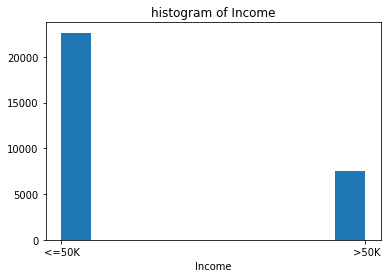

In [34]:
#visualize the histogram of Income

plt.hist(df['Income'])
plt.xlabel('Income')
plt.title('histogram of Income')

we can clearly see that "<=50K" values are more occuring then ">50K" values. SO,we can deal with this kind of imbalanced data by using a F1-score as our metrics evaluation method while training the model

In [35]:
import warnings
warnings.filterwarnings('ignore') #to remove warning messages

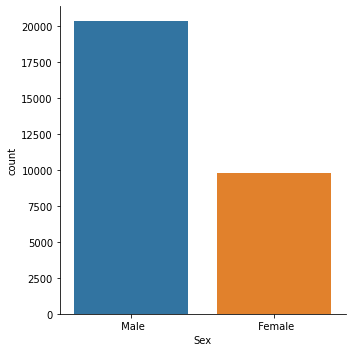

In [38]:
sns.factorplot('Sex', data=df, kind="count") ## Let's check Sex

So,there are more records on male then female

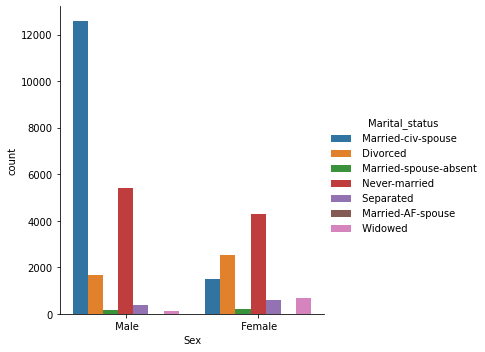

In [39]:
# Now let's seperate the genders by MaritalStatus  using 'hue' arguement 

sns.factorplot('Sex', data=df, kind="count", hue='Marital_status')

So,we can say that there are majority number of records on of "male" person who are "married-clv-spouse".
And there are more records on "female" who are "Never-married".

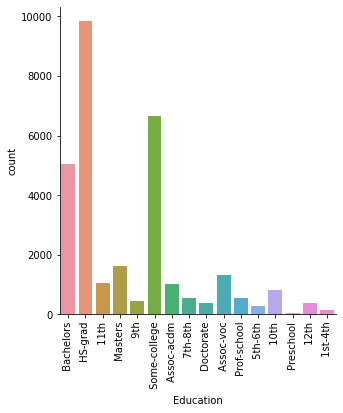

In [53]:
a = sns.factorplot('Education', data=df, kind="count")
a.set_xticklabels(rotation=90)

So,there are more people who had a education at a "HS-grad" level

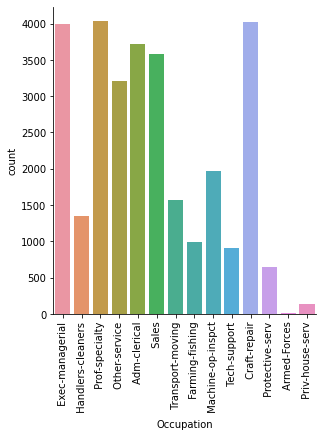

In [58]:
a = sns.factorplot('Occupation', data=df, kind="count")
a.set_xticklabels(rotation=90)

SO,most of them are workng as a craft repair,Exec-managerial and Prof-speciality.

In [59]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

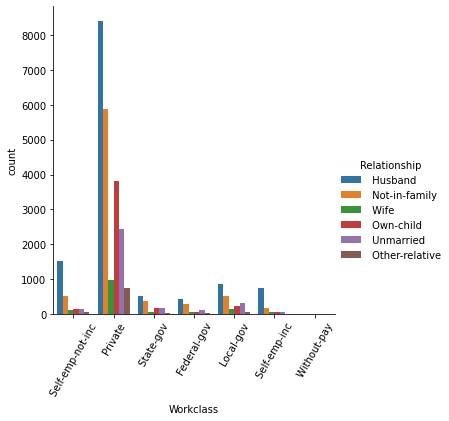

In [64]:
a = sns.factorplot('Workclass', data=df, kind="count", hue='Relationship')
a.set_xticklabels(rotation=60)

So,clearly most people are working in Private sector in which the there are more records on person who is in a relationship as Husband and also 2nd most people who are working in private sector are not-in-family at all. 

In [69]:
#Since there are objective type columns,so we can use Label encoder method

from sklearn.preprocessing import LabelEncoder

df['Workclass'] = LabelEncoder().fit_transform(df['Workclass'])
df['Education'] = LabelEncoder().fit_transform(df['Education'])
df['Marital_status'] = LabelEncoder().fit_transform(df['Marital_status'])
df['Occupation'] = LabelEncoder().fit_transform(df['Occupation'])
df['Relationship'] = LabelEncoder().fit_transform(df['Relationship'])
df['Race'] = LabelEncoder().fit_transform(df['Race'])
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Native_country'] = LabelEncoder().fit_transform(df['Native_country'])
df['Income'] = LabelEncoder().fit_transform(df['Income'])

In [70]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,2,284582,12,14,2,3,5,4,0,0,0,40,38,0


## Correlation

In [71]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.080488,-0.076279,-0.001158,0.043202,-0.276233,-0.005660,-0.246482,0.023857,0.081827,0.080162,0.060141,0.101349,-0.002340,0.242019
Workclass,0.080488,1.000000,-0.032314,0.017854,0.037668,-0.034267,0.015768,-0.067378,0.044709,0.074883,0.035330,0.007207,0.050712,0.007556,0.018088
Fnlwgt,-0.076279,-0.032314,1.000000,-0.027016,-0.045161,0.032154,-0.000075,0.009225,-0.024080,0.025627,0.000425,-0.009763,-0.023037,-0.066495,-0.009012
Education,-0.001158,0.017854,-0.027016,1.000000,0.345334,-0.040668,-0.038195,-0.012926,0.011338,-0.027959,0.030618,0.015073,0.060439,0.078180,0.079033
Education_num,0.043202,0.037668,-0.045161,0.345334,1.000000,-0.063292,0.087763,-0.092220,0.033004,0.006023,0.124452,0.079623,0.152848,0.090634,0.335444
Marital_status,-0.276233,-0.034267,0.032154,-0.040668,-0.063292,1.000000,0.022577,0.178045,-0.068603,-0.119897,-0.042397,-0.035148,-0.188889,-0.025478,-0.193390
Occupation,-0.005660,0.015768,-0.000075,-0.038195,0.087763,0.022577,1.000000,-0.053721,0.000754,0.062567,0.022159,0.014575,0.018425,-0.003368,0.051450
Relationship,-0.246482,-0.067378,0.009225,-0.012926,-0.092220,0.178045,-0.053721,1.000000,-0.117113,-0.585030,-0.058284,-0.063603,-0.257749,-0.010939,-0.251033
Race,0.023857,0.044709,-0.024080,0.011338,0.033004,-0.068603,0.000754,-0.117113,1.000000,0.089421,0.014370,0.023548,0.048550,0.124837,0.071697
Sex,0.081827,0.074883,0.025627,-0.027959,0.006023,-0.119897,0.062567,-0.585030,0.089421,1.000000,0.048816,0.047014,0.231129,0.000278,0.216684


In [72]:
#with target variable
df.corr()['Income'].sort_values()

Relationship     -0.251033
Marital_status   -0.193390
Fnlwgt           -0.009012
Workclass         0.018088
Native_country    0.023047
Occupation        0.051450
Race              0.071697
Education         0.079033
Capital_loss      0.150023
Sex               0.216684
Capital_gain      0.221208
Hours_per_week    0.229435
Age               0.242019
Education_num     0.335444
Income            1.000000
Name: Income, dtype: float64

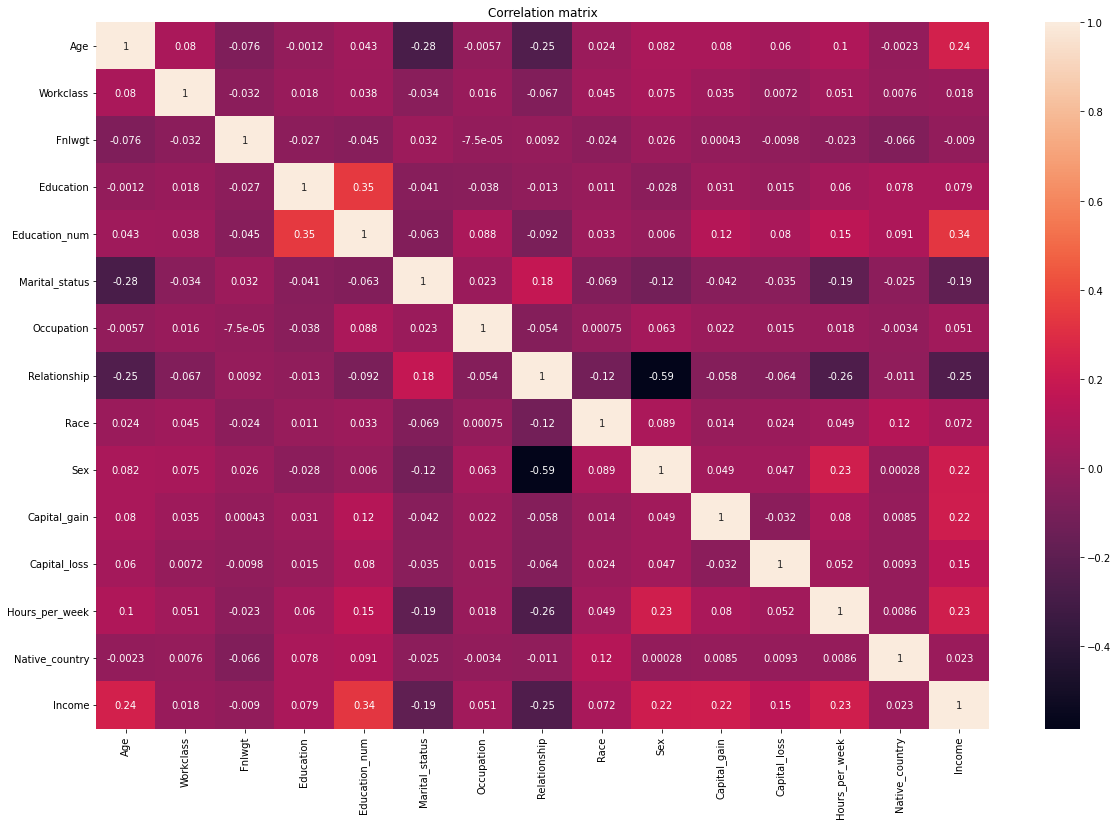

In [73]:
#plotting the correlation matrix using heatmap

corr_matrix = df.corr()
plt.figure(figsize=[20,13])
sns.heatmap(corr_matrix,annot=True)
plt.title("Correlation matrix")
plt.show()

### with this,there are both positive and negativs correlations with target variable
#### 1)"Relationship" column has highest negative correlation(25%) with "Income".
#### 2) "Fnlwgt" column has least neagtive correlation(<1%) with "Income".
#### 3) "Education_num" has highest postive correlation(34%) with "Income"
#### 4) "Workclass" has least postive correlation(2%) with "Income"

## Checking with outliers

In [77]:
df1 = df.iloc[:,:8]
df2 = df.iloc[:,8:]

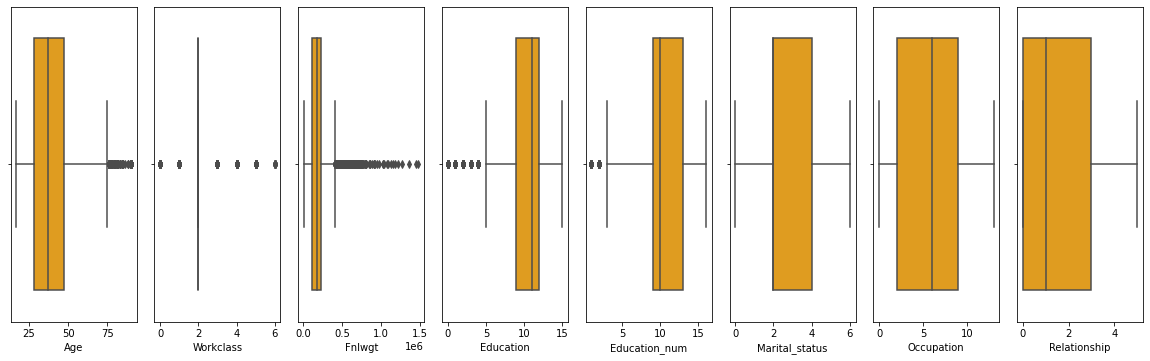

In [78]:
column_list = df1.columns.values
n_col = 31
n_row = 25
plt.figure(figsize = (2*n_col,4*n_col))
for i in range(len(column_list)):
  plt.subplot(n_row,n_col,i+1)
  sns.boxplot(df[column_list[i]],color='orange',orient='h')
  plt.tight_layout()

So,clearly there are more outliers in "Fnlwgt" with few being in other columns like "Age","Workclass" and "Education"

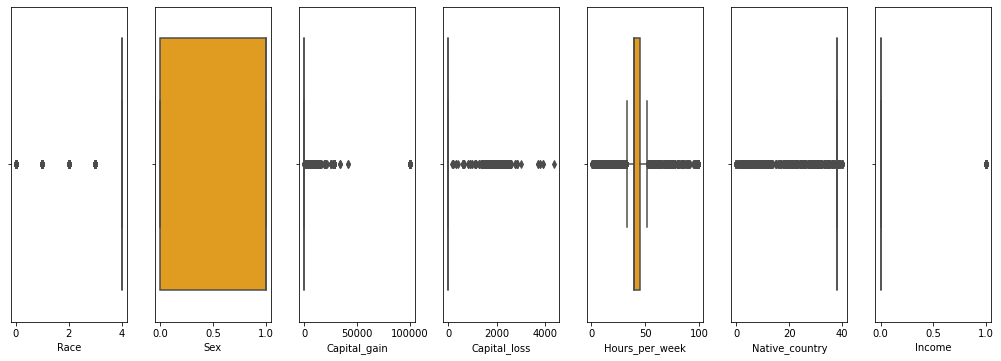

In [79]:
column_list = df2.columns.values
n_col = 31
n_row = 25
plt.figure(figsize = (2*n_col,4*n_col))
for i in range(len(column_list)):
  plt.subplot(n_row,n_col,i+1)
  sns.boxplot(df[column_list[i]],color='orange',orient='h')
  plt.tight_layout()

So,there are more number of outliers in "Native_country","Hours_per_week",
"capital_loss","capital_gain" with few being in "Race" column.

## checking with Skewness

In [80]:
df.skew().sort_values()

Native_country    -4.183022
Race              -2.506586
Education         -0.945155
Sex               -0.750833
Education_num     -0.302794
Marital_status    -0.008625
Occupation         0.110330
Hours_per_week     0.332373
Age                0.528967
Relationship       0.820044
Workclass          1.154120
Income             1.160593
Fnlwgt             1.460047
Capital_loss       4.524323
Capital_gain      11.897934
dtype: float64

By setting up threshold of -1.5 to 1.5.
we can remove columns like "Capital_gain","Capital_loss","Native_country","Race".Also these columns have more numbers of outliers as well as less correlation with target variable "Income"

In [84]:
df = df.drop(["Capital_gain","Capital_loss","Native_country","Race"],axis=1)
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Sex,Hours_per_week,Income
0,50,4,83311,9,13,2,3,0,1,13,0
1,38,2,215646,11,9,0,5,1,1,40,0
2,53,2,234721,1,7,2,5,0,1,40,0
3,28,2,338409,9,13,2,9,5,0,40,0
4,37,2,284582,12,14,2,3,5,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...
32555,27,2,257302,7,12,2,12,5,0,38,0
32556,40,2,154374,11,9,2,6,0,1,40,1
32557,58,2,151910,11,9,6,0,4,0,40,0
32558,22,2,201490,11,9,4,0,3,1,20,0


## Removing the outliers


In [85]:
#with z-score technique

from scipy.stats import zscore
import numpy as np
z_n = np.abs(zscore(df))
z_n.shape

(30138, 11)

In [86]:
threshold = 3

df_new = df[(z_n<threshold).all(axis=1)]
print(df.shape)
print(df_new.shape)

#printing the total number of dropped rows
print(df.shape[0]-df_new.shape[0])

(30138, 11)
(29114, 11)
1024


## calcuating the percentage of data loss

In [87]:
loss_perc = (df.shape[0]-df_new.shape[0])/df.shape[0]*100
print("data loss percentage:{:.2f}%".format(loss_perc))

data loss percentage:3.40%


there is a 3.40% data loss which is good to proceed for further

## Dividing the data into features and vectors

In [88]:
y = df_new[["Income"]]
x = df_new.drop(["Income"],axis=1)

## Checking with multicollinearity

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif_value(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [90]:
calc_vif_value(x)

,variables,VIF
0,Age,8.993327
1,Workclass,6.077742
2,Fnlwgt,4.517442
3,Education,9.247056
4,Education_num,18.671274
5,Marital_status,3.823284
6,Occupation,3.169309
7,Relationship,2.441422
8,Sex,4.400155
9,Hours_per_week,14.324831


## Reducing the multicollinearity

In [91]:
x["Education_num_Hours_per_week"] = df.apply(lambda x_1: x_1['Education_num'] - x_1['Hours_per_week'],axis=1)

In [92]:
x= x.drop(["Education_num","Hours_per_week"],axis=1)

In [93]:
calc_vif_value(x)

,variables,VIF
0,Age,8.198065
1,Workclass,5.942534
2,Fnlwgt,4.461317
3,Education,7.125486
4,Marital_status,3.723096
5,Occupation,3.055909
6,Relationship,2.411769
7,Sex,4.352991
8,Education_num_Hours_per_week,8.314470


Now,its much better with the previous values

## Transforming data to eliminate skewness

In [94]:
from sklearn.preprocessing import power_transform
x = power_transform(x)
x[:5]

array([[ 0.94580759,  1.77774497, -1.11431136, -0.50536833, -0.36060145,
        -0.63130138, -1.08371522,  0.69622295,  2.59863981],
       [ 0.10548425, -0.12557493,  0.42729606,  0.0733318 , -1.7659107 ,
        -0.10264814,  0.16064634,  0.69622295, -0.02781943],
       [ 1.13235323, -0.12557493,  0.6073857 , -2.10916765, -0.36060145,
        -0.10264814, -1.08371522,  0.69622295, -0.22088726],
       [-0.7585493 , -0.12557493,  1.48743433, -0.50536833, -0.36060145,
         0.78370144,  1.55017992, -1.4363215 ,  0.35284478],
       [ 0.02710889, -0.12557493,  1.04888382,  0.38475417, -0.36060145,
        -0.63130138,  1.55017992, -1.4363215 ,  0.44679357]])

In [96]:
x_n1 = pd.DataFrame(x) #to check with skewness again
x_n1.skew()

0   -0.022980
1    0.122925
2   -0.035077
3   -0.287058
4   -0.118544
5   -0.206020
6    0.135101
7   -0.740137
8   -0.072180
dtype: float64

Its much better with skewness values compared to previous values

## Selecting a best random state

In [99]:
#importing a necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

accu_score = 0
maxRS = 0 #best random state value for max accuracy_score
for i in range(1,200):
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.20,random_state = i)
  LR = LogisticRegression()
  LR.fit(x_train,y_train)
  predic = LR.predict(x_test)
  acc = accuracy_score(y_test,predic)
  if acc > accu_score:
    accu_score = acc
    maxRS = i
print("Best accuracy_score is ",accu_score," on Random state ",maxRS)

Best accuracy_score is  0.7741713893182208  on Random state  85


In [100]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.20,random_state = 85)

In [101]:
print(x_train.shape,y_train.shape)

(23291, 9) (23291, 1)


In [102]:
print(x_test.shape,y_test.shape)

(5823, 9) (5823, 1)


In [103]:
# To predict the Income,we can consider Logistic regressiom model
LR = LogisticRegression()
LR.fit(x_train,y_train)
predic_1 = LR.predict(x_test)
print("accuracy_score is {:0.3f}".format(accuracy_score(y_test,predic_1)))

#Since the class imbalance exists so, we can use F1-score as evaluation metrics
from sklearn.metrics import f1_score
print("f1_score is {:0.3f}".format(f1_score(y_test,predic_1)))

#confusion matrix and classification report

print(confusion_matrix(y_test,predic_1))
print(classification_report(y_test,predic_1))

accuracy_score is 0.774
f1_score is 0.360
[[4138  260]
 [1055  370]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      4398
           1       0.59      0.26      0.36      1425

    accuracy                           0.77      5823
   macro avg       0.69      0.60      0.61      5823
weighted avg       0.75      0.77      0.74      5823



In [104]:
#using DecisionTree classifier
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
predic_2 = DT.predict(x_test)
print("accuracy_score is {:0.3f}".format(accuracy_score(y_test,predic_2)))

#Since the class imbalance exists so, we can use F1-score as evaluation metrics
from sklearn.metrics import f1_score
print("f1_score is {:0.3f}".format(f1_score(y_test,predic_2)))

#confusion matrix and classification report

print(confusion_matrix(y_test,predic_2))
print(classification_report(y_test,predic_2))

accuracy_score is 0.777
f1_score is 0.553
[[3721  677]
 [ 622  803]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      4398
           1       0.54      0.56      0.55      1425

    accuracy                           0.78      5823
   macro avg       0.70      0.70      0.70      5823
weighted avg       0.78      0.78      0.78      5823



In [105]:
#Using KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

KN = KNeighborsClassifier()
KN.fit(x_train,y_train)
predic_3 = KN.predict(x_test)
print("accuracy_score is {:0.3f}".format(accuracy_score(y_test,predic_3)))

#Since the class imbalance exists so, we can use F1-score as evaluation metrics
from sklearn.metrics import f1_score
print("f1_score is {:0.3f}".format(f1_score(y_test,predic_3)))

#confusion matrix and classification report

print(confusion_matrix(y_test,predic_3))
print(classification_report(y_test,predic_3))

accuracy_score is 0.801
f1_score is 0.573
[[3891  507]
 [ 649  776]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4398
           1       0.60      0.54      0.57      1425

    accuracy                           0.80      5823
   macro avg       0.73      0.71      0.72      5823
weighted avg       0.80      0.80      0.80      5823



In [106]:
#Using Random forest Classifer
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train,y_train)
predic_4 = RF.predict(x_test)
print("accuracy_score is {:0.3f}".format(accuracy_score(y_test,predic_4)))

#Since the class imbalance exists so, we can use F1-score as evaluation metrics
from sklearn.metrics import f1_score
print("f1_score is {:0.3f}".format(f1_score(y_test,predic_4)))

#confusion matrix and classification report

print(confusion_matrix(y_test,predic_4))
print(classification_report(y_test,predic_4))

accuracy_score is 0.822
f1_score is 0.606
[[3989  409]
 [ 627  798]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      4398
           1       0.66      0.56      0.61      1425

    accuracy                           0.82      5823
   macro avg       0.76      0.73      0.75      5823
weighted avg       0.81      0.82      0.82      5823



f1_score and accuracy is high for RandomForestClassifier model

## Cross Validation to check with overfitting

In [107]:
from sklearn.model_selection import cross_val_score

#for Logistic regression model
L_cr = cross_val_score(LR,x,y,cv=5)
print("cross validation for Logistics regression model : ",L_cr.mean())

cross validation for Logistics regression model :  0.7618671512705071


In [108]:
L_cr = cross_val_score(KN,x,y,cv=5)
print("cross validation for KNN classifier model : ",L_cr.mean())

cross validation for KNN classifier model :  0.799168744892926


In [109]:
L_cr = cross_val_score(DT,x,y,cv=5)
print("cross validation for Decision tree model : ",L_cr.mean())

cross validation for Decision tree model :  0.769526681204074


In [110]:
L_cr = cross_val_score(RF,x,y,cv=5)
print("cross validation for Random forest model : ",L_cr.mean())

cross validation for Random forest model :  0.8198460033014463


here also,the CV score is more for RandomForestClassifier  model. So, I will take my final model as RandomForestClassifier  model

## Hyper parameter tuning

In [113]:
from sklearn.model_selection import GridSearchCV

params_list = {'criterion':['gini','entropy'],
               'max_features':['auto','sqrt','log2'],
               'bootstrap':[True,False],
               'max_depth':[None,2,3,4]}
GCV = GridSearchCV(RandomForestClassifier(),params_list,cv=5,scoring="f1")
GCV.fit(x_train,y_train)

#printing the best parameter
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'log2'}

In [117]:
#now predicting with best parameters

GCV_predic = GCV.best_estimator_.predict(x_test)

#getting the final accuracy
print("accuarcy_score is",accuracy_score(y_test,GCV_predic))
print("f1_score is",f1_score(y_test,GCV_predic))

accuarcy_score is 0.8236304310492873
f1_score is 0.6128910667169242


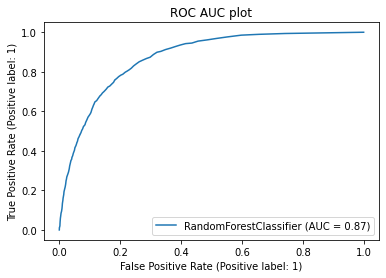

In [118]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

from the above graph we got AUC score is 87%

In [120]:
import joblib
joblib.dump(GCV.best_estimator_,"Census_Income_Project.pkl")

['Census_Income_Project.pkl']